Сначала выковыряем из текстового файла значения выборки.

In [86]:

lines = []
myfile = open("ping.txt", "rt") 
for line in myfile:
    lines.append(line)
datastr = []
for line in lines:
    start = line.find("time=")+5
    datastr.append(line[start:start+4])
data = []
for each in datastr:
    data.append(float(each))
print(data)

[44.2, 42.0, 43.2, 45.1, 44.9, 45.4, 51.6, 41.9, 44.0, 51.5, 41.3, 45.0, 43.4, 41.5, 43.2, 44.9, 42.7, 41.3, 47.0, 44.2, 42.4, 42.9, 40.8, 43.3, 44.0, 42.3, 41.5, 43.5, 41.9, 50.5, 41.2, 41.1, 41.2, 41.5, 47.9, 41.7, 46.7, 48.8, 41.2, 46.6, 41.0, 41.7, 45.8, 42.3, 56.7, 46.1, 42.2, 41.1, 41.5, 41.9, 41.4, 43.3, 41.5, 42.1, 41.3, 42.5, 43.0, 43.0, 40.9, 41.2, 43.7, 41.1, 44.2, 51.3, 44.9, 42.6, 42.1, 43.1, 44.4, 42.2, 42.4, 42.7, 42.0, 44.1, 45.4, 43.0, 52.6, 43.7, 46.8, 42.7, 41.1, 41.6, 42.6, 41.2, 40.3, 41.0, 47.7, 48.0, 43.6, 45.9, 40.9, 44.1, 42.0, 43.0, 48.8, 43.7, 48.5, 40.9, 41.1, 41.3, 49.5, 42.9, 47.9, 44.7, 43.3, 44.9, 43.3, 44.2, 46.6, 43.0, 42.2, 41.4, 45.0, 41.6, 44.6, 48.2, 44.6, 43.7, 42.5, 45.8, 41.2, 48.7, 43.5, 42.4, 41.9, 41.1, 41.4, 43.8, 41.4, 42.3, 43.4, 40.9, 44.2, 50.4, 41.1, 41.1, 43.0, 42.3, 42.3, 42.5, 41.3, 41.3, 43.5, 44.8, 40.8, 43.5, 41.4, 41.3, 42.0, 41.6, 43.0, 42.0, 41.0, 43.2, 41.3, 42.7, 48.4, 42.1, 42.0, 42.8, 42.1, 42.4, 51.7, 52.2, 44.6, 41.6, 53.

Затем разобъем область определения на интервалы длинной в 1ms и посмотрим как значения выборки распределены по этим интервалам.

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. 10. 51. 42. 35. 23.  8.  6.  4.  7.  1.  2.  4.  2.  2.
  0.  0.  1.  1.  0.  0.]


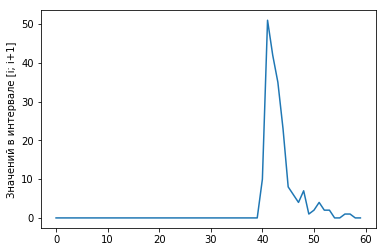

In [87]:
import numpy
import math
import matplotlib.pyplot as plt
interval = numpy.zeros(60)
for each in data:
    interval[math.floor(each)] += 1
print(interval)
plt.plot(interval)
plt.ylabel('Значений в интервале [i; i+1]')
plt.show()

In [88]:
import statistics
print("Среднее выборочное:")
print(statistics.mean(data))
print("Медиана:")
print(statistics.median(data))
print("Мода:")
print(statistics.mode(data))

Среднее выборочное:
43.6713567839196
Медиана:
42.8
Мода:
41.1


Глядя на график, предполагаем, что распределение логарифмически-нормальное. Для проверки гипотезы воспользуемся критерием Пирсона. Попробуем подогнать mu и sigma так, чтобы статистика критерия согласия Пирсона была как можно меньше. Нужно добиться чтобы теоретическая вероятность попадания в интервал была как можно ближе к частоте попаданий, полученной на практике.

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.440892098500626e-16, 3.552713678800501e-14, 1.853794895367855e-12, 6.376388306250647e-11, 1.50206652671514e-09, 2.5066972664244958e-08, 3.053588345514058e-07, 2.7884681815804058e-06, 1.9546706213680043e-05, 0.00010743957247610902, 0.000471990301911307, 0.00168600670277258, 0.004974009259738454, 0.012291595065005267, 0.025771520670737125, 0.04638556315529935, 0.07243967950072477, 0.09912128868716696, 0.11990759373808241, 0.12929771924446087, 0.12522426241161566, 0.10969079155908334, 0.0874646743542965, 0.06386466795094936, 0.04293841195187165, 0.02671806799926202, 0.015459458048016517, 0.008354565102659084, 0.004234189693417489, 0.002020168792007615, 0.0009105787029470847, 0.000389043468926098, 0.00015804213662629074, 6.122059821900283e-05, 2.2674996251970114e-05, 8.050491185240816e-06, 2.7463421323759007e-06]


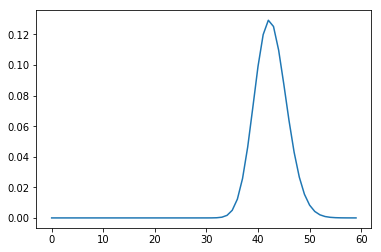

In [89]:
mu = 3.782
sigma = 0.14
probability_theoretical = []
for i in range(1, 61):
    probability_theoretical.append((0.5+0.5*math.erf((math.log(i+1)-mu)/sigma*math.sqrt(2)))-(0.5+0.5*math.erf((math.log(i)-mu)/sigma*math.sqrt(2))))
print(probability_theoretical)
plt.plot(probability_theoretical)
plt.show()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.255, 0.21, 0.175, 0.115, 0.04, 0.03, 0.02, 0.035, 0.005, 0.01, 0.02, 0.01, 0.01, 0.0, 0.0, 0.005, 0.005, 0.0, 0.0]


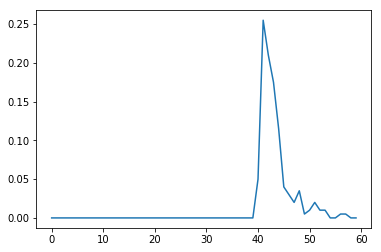

In [90]:
frequency = []
for i in range(0, 60):
    frequency.append(float(interval[i])/200)
print(frequency)
plt.plot(frequency)
plt.show()

In [91]:
summ = 0
for i in range(35, 56):
    summ += ((frequency[i] - probability_theoretical[i])**2)/probability_theoretical[i]
crit = 200 * (summ)
print(crit)

131.25156378899555


Сравнив полученное значение статистики с приведенными в таблице квантилей распределения хи-квадрат видим, что оно получилось слишком большим. Поэтому принять гипотезу как истинную нельзя.